# <center> Harmony & Healing: Unveiling the Impact of Music on Mental Health

![](mxh.jpg)

**BY:** <br> 
`Baguio`, Christian Jay <br>
`Bandivas`, Roxanne Mae <br>
`Barrio`, Reyjane Mae <br>
`Palmes`, Jhibsam <br>
`Sabacajan`, Cle Michael <br>
`Tapao`, Mark Vincent

**Course:** Machine Learning <br/>
**Program & Section:** BS in Data Science - DS3A

# **🎧Introduction**
In the field of mental health, the healing power of music is increasingly recognized and accepted. Music therapy (MT) stands for Light of Hope, which uses rhyme, melody, and harmony as tools for emotional expression, stress reduction, and mood enhancement. The machine model derived from Music and Mental Health (MxMH) aims to predict the possible effects of certain music on the psyche of each individual by analyzing, through machine learning algorithms, the complex interactions between musical genres, emotional responses, and mental health outcomes. The target variable for our study is the music effect, described as 'Does music improve/worsen the respondent's mental health conditions?'. This approach allows us to identify specific therapeutic targets by predicting significant trends in music preferences and psychological resilience. Ultimately, our research aims to enhance the application of music therapy, offering personalized musical interventions to improve mental health outcomes.


# `🎧About the Dataset`

Music & Mental Health Survey (CC0: Public Domain) <a href="https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results?select=mxmh_survey_results.csv">Dataset</a>

### `🎧Features and Attributes`

* Age = Respondent's Age
* Primary streaming service = Respondent's primary streaming service
* Hours per day = Number of hours the respondent listens to music per day
* While working = Does the respondent listen to music while studying/working?
* Instrumentalist = Does the respondent play an instrument regularly?
* Composer = Does the respondent compose music?
* Exploratory = Does the respondent actively explore new artists/genres?
* Foreign languages = Does the respondent regularly listen to music with lyrics in a language they are not fluent in?
* Fav genre = Respondent's favorite or top genre
* BPM = Beats per minute of favorite genre
* Respondents rank how often they listen to 16 music genres, where they can select: Never, Rarely, Sometimes, Very, frequently
* Respondents rank Anxiety, Depression, Insomnia, and OCD on a scale of 0 to 10, where:
    * 0 - I do not experience this.
    * 10 - I experience this regularly, constantly/or to an extreme.
* Music effects = Does music improve/worsen respondent's mental health conditions?

## `🔃Import Necessary Libraries`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split as tts, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from collections import Counter
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from tabulate import tabulate
from sklearn.svm import LinearSVC
from sklearn.base import TransformerMixin
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('mxmh.csv')
df = df.drop(columns=['Timestamp', 'Permissions'])
df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


## `🔎Data Understanding`

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           735 non-null    float64
 1   Primary streaming service     735 non-null    object 
 2   Hours per day                 736 non-null    float64
 3   While working                 733 non-null    object 
 4   Instrumentalist               732 non-null    object 
 5   Composer                      735 non-null    object 
 6   Fav genre                     736 non-null    object 
 7   Exploratory                   736 non-null    object 
 8   Foreign languages             732 non-null    object 
 9   BPM                           629 non-null    float64
 10  Frequency [Classical]         736 non-null    object 
 11  Frequency [Country]           736 non-null    object 
 12  Frequency [EDM]               736 non-null    object 
 13  Frequ

In [3]:
df.columns

Index(['Age', 'Primary streaming service', 'Hours per day', 'While working',
       'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory',
       'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects'],
      dtype='object')

In [4]:
cols = [col.replace(" ", "_").replace("[", "").replace("]", "") for col in df.columns]
df.columns = cols

In [5]:
df.columns

Index(['Age', 'Primary_streaming_service', 'Hours_per_day', 'While_working',
       'Instrumentalist', 'Composer', 'Fav_genre', 'Exploratory',
       'Foreign_languages', 'BPM', 'Frequency_Classical', 'Frequency_Country',
       'Frequency_EDM', 'Frequency_Folk', 'Frequency_Gospel',
       'Frequency_Hip_hop', 'Frequency_Jazz', 'Frequency_K_pop',
       'Frequency_Latin', 'Frequency_Lofi', 'Frequency_Metal', 'Frequency_Pop',
       'Frequency_R&B', 'Frequency_Rap', 'Frequency_Rock',
       'Frequency_Video_game_music', 'Anxiety', 'Depression', 'Insomnia',
       'OCD', 'Music_effects'],
      dtype='object')

In [4]:
# Check for null values
df.isna().sum()

Age                             1
Primary_streaming_service       1
Hours_per_day                   0
While_working                   3
Instrumentalist                 4
Composer                        1
Fav_genre                       0
Exploratory                     0
Foreign_languages               4
BPM                           107
Frequency_Classical             0
Frequency_Country               0
Frequency_EDM                   0
Frequency_Folk                  0
Frequency_Gospel                0
Frequency_Hip_hop               0
Frequency_Jazz                  0
Frequency_K_pop                 0
Frequency_Latin                 0
Frequency_Lofi                  0
Frequency_Metal                 0
Frequency_Pop                   0
Frequency_R&B                   0
Frequency_Rap                   0
Frequency_Rock                  0
Frequency_Video_game_music      0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD           

## `Data Imputation`

In [6]:
num = df.select_dtypes(include='float64')
cat = df.select_dtypes(include='object')

In [7]:
# Create a SimpleImputer specifying strategies
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

num_imputer.fit(num)
cat_imputer.fit(cat)

num_imputed = num_imputer.transform(num)
cat_imputed = cat_imputer.transform(cat)

df = pd.concat([pd.DataFrame(num_imputed, columns=num.columns), 
                        pd.DataFrame(cat_imputed, columns=cat.columns)], axis=1)

In [10]:
df.isna().sum().sum()

0

## `Data Preprocessing`

In [7]:
# Print unique values for each object column to check which is ordinal and nominal
for col in df.select_dtypes(include='object'):
    print(f"Column: {col}")
    print(f"Unique Values:\n {df[col].unique()}")
    print("\n")

Column: Primary_streaming_service
Unique Values:
 ['Spotify' 'Pandora' 'YouTube Music' 'I do not use a streaming service.'
 'Apple Music' 'Other streaming service']


Column: While_working
Unique Values:
 ['Yes' 'No']


Column: Instrumentalist
Unique Values:
 ['Yes' 'No']


Column: Composer
Unique Values:
 ['Yes' 'No']


Column: Fav_genre
Unique Values:
 ['Latin' 'Rock' 'Video game music' 'Jazz' 'R&B' 'K pop' 'Country' 'EDM'
 'Hip hop' 'Pop' 'Rap' 'Classical' 'Metal' 'Folk' 'Lofi' 'Gospel']


Column: Exploratory
Unique Values:
 ['Yes' 'No']


Column: Foreign_languages
Unique Values:
 ['Yes' 'No']


Column: Frequency_Classical
Unique Values:
 ['Rarely' 'Sometimes' 'Never' 'Very frequently']


Column: Frequency_Country
Unique Values:
 ['Never' 'Sometimes' 'Very frequently' 'Rarely']


Column: Frequency_EDM
Unique Values:
 ['Rarely' 'Never' 'Very frequently' 'Sometimes']


Column: Frequency_Folk
Unique Values:
 ['Never' 'Rarely' 'Sometimes' 'Very frequently']


Column: Frequency_Gospel
Un

In [8]:
df1 = df.drop('Primary_streaming_service', axis=1)

# Define label encodings for ordinal variables
ordinal_encodings = {
    'While_working': {'Yes': 1, 'No': 0},
    'Instrumentalist': {'Yes': 1, 'No': 0},
    'Composer': {'Yes': 1, 'No': 0},
    'Exploratory': {'Yes': 1, 'No': 0},
    'Foreign_languages': {'Yes': 1, 'No': 0},
    'Frequency_Classical': {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3},
    'Frequency_Country': {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3},
    'Frequency_EDM': {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3},
    'Frequency_Folk': {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3},
    'Frequency_Gospel': {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3},
    'Frequency_Hip_hop': {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3},
    'Frequency_Jazz': {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3},
    'Frequency_K_pop': {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3},
    'Frequency_Latin': {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3},
    'Frequency_Lofi': {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3},
    'Frequency_Metal': {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3},
    'Frequency_Pop': {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3},
    'Frequency_R&B': {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3},
    'Frequency_Rap': {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3},
    'Frequency_Rock': {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3},
    'Frequency_Video_game_music': {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3},
    'Music_effects': {'Worsen': 0, 'No effect': 1, 'Improve': 2}
}

In [9]:
# Define the nominal and ordinal columns
nominal_cols = ['Fav_genre']
ordinal_cols = ['While_working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign_languages', 'Music_effects'] + [col for col in df1.columns if col.startswith('Frequency_')]

In [10]:
le = LabelEncoder()
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [11]:
# Encode nominal data using OneHotEncoder
nominal_encoded = ohe.fit_transform(df[nominal_cols])
nominal_df = pd.DataFrame(nominal_encoded, columns=ohe.get_feature_names_out(nominal_cols))

In [14]:
# Encode ordinal data using LabelEncoder
for col in ordinal_cols:
    df1[col] = le.fit_transform(df1[col].map(ordinal_encodings[col]))

In [25]:
df1 = pd.concat([df1, nominal_df], axis=1)

In [26]:
df1.head(50)

,Age,Hours_per_day,BPM,Anxiety,Depression,Insomnia,OCD,While_working,Instrumentalist,Composer,...,Fav_genre_Jazz,Fav_genre_K pop,Fav_genre_Latin,Fav_genre_Lofi,Fav_genre_Metal,Fav_genre_Pop,Fav_genre_R&B,Fav_genre_Rap,Fav_genre_Rock,Fav_genre_Video game music
0,18.000000,3.00,1.560000e+02,3.0,0.0,1.0,0.0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,63.000000,1.50,1.190000e+02,7.0,2.0,2.0,1.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,18.000000,4.00,1.320000e+02,7.0,7.0,10.0,2.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,61.000000,2.50,8.400000e+01,9.0,7.0,3.0,3.0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18.000000,4.00,1.070000e+02,7.0,2.0,5.0,9.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,18.000000,5.00,8.600000e+01,8.0,8.0,7.0,7.0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,18.000000,3.00,6.600000e+01,4.0,8.0,6.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,21.000000,1.00,9.500000e+01,5.0,3.0,5.0,3.0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,19.000000,6.00,9.400000e+01,2.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,18.000000,1.00,1.550000e+02,2.0,2.0,5.0,1.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
df1 = df1.drop('Fav_genre', axis=1)
df1.head()

,Age,Hours_per_day,BPM,Anxiety,Depression,Insomnia,OCD,While_working,Instrumentalist,Composer,...,Fav_genre_Jazz,Fav_genre_K pop,Fav_genre_Latin,Fav_genre_Lofi,Fav_genre_Metal,Fav_genre_Pop,Fav_genre_R&B,Fav_genre_Rap,Fav_genre_Rock,Fav_genre_Video game music
0,18.0,3.0,156.0,3.0,0.0,1.0,0.0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,63.0,1.5,119.0,7.0,2.0,2.0,1.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,18.0,4.0,132.0,7.0,7.0,10.0,2.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,61.0,2.5,84.0,9.0,7.0,3.0,3.0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18.0,4.0,107.0,7.0,2.0,5.0,9.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
# Transform the numerical data using the fitted scaler
scaler = StandardScaler()

scaler.fit(df1)

df_scaled = scaler.transform(df1.copy())
df_scaled = pd.DataFrame(df_scaled, columns=df1.columns)

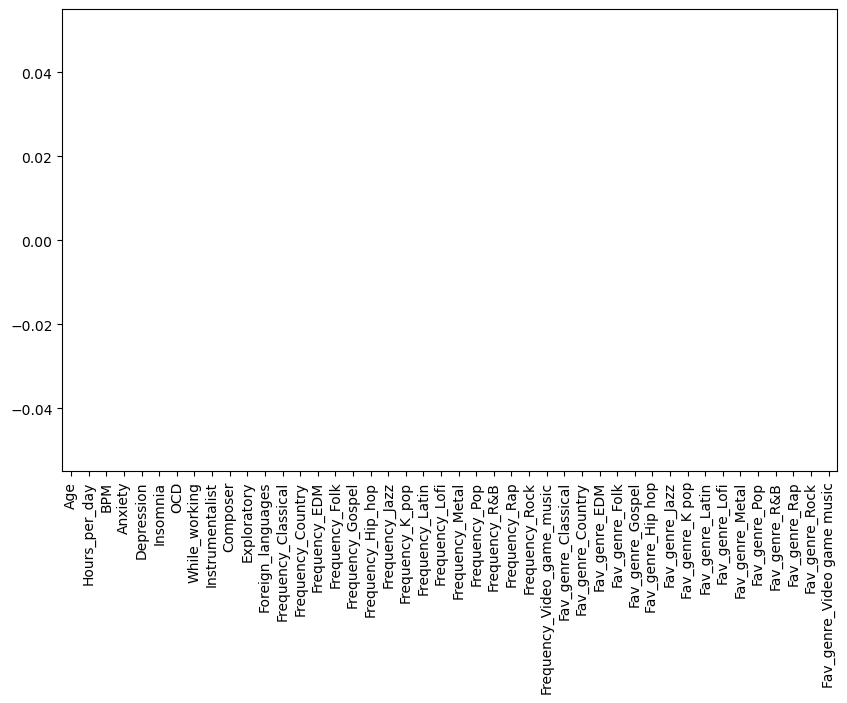

In [19]:
plt.figure(figsize = (10, 6))
corr = df_scaled.corr()['Music_effects'].sort_values(ascending=False)
corr.drop('Music_effects').plot(kind = 'bar')
plt.show()

In [20]:
df_scaled.head()

,Age,Hours_per_day,BPM,Anxiety,Depression,Insomnia,OCD,While_working,Instrumentalist,Composer,...,Fav_genre_Jazz,Fav_genre_K pop,Fav_genre_Latin,Fav_genre_Lofi,Fav_genre_Metal,Fav_genre_Pop,Fav_genre_R&B,Fav_genre_Rap,Fav_genre_Rock,Fav_genre_Video game music
0,-0.598642,-0.189270,-0.043164,-1.016652,-1.584570,-0.887209,-0.928573,0.0,0.0,0.0,...,-0.167132,-0.191363,15.631165,-0.117363,-0.368514,-0.428112,-0.223447,-0.175534,-0.585718,-0.252158
1,3.139340,-0.684951,-0.043165,0.416445,-0.923809,-0.563227,-0.576471,0.0,0.0,0.0,...,-0.167132,-0.191363,-0.063975,-0.117363,-0.368514,-0.428112,-0.223447,-0.175534,1.707306,-0.252158
2,-0.598642,0.141184,-0.043165,0.416445,0.728094,2.028630,-0.224369,0.0,0.0,0.0,...,-0.167132,-0.191363,-0.063975,-0.117363,-0.368514,-0.428112,-0.223447,-0.175534,-0.585718,3.965763
3,2.973208,-0.354497,-0.043166,1.132994,0.728094,-0.239245,0.127733,0.0,0.0,0.0,...,5.983310,-0.191363,-0.063975,-0.117363,-0.368514,-0.428112,-0.223447,-0.175534,-0.585718,-0.252158
4,-0.598642,0.141184,-0.043166,0.416445,-0.923809,0.408719,2.240345,0.0,0.0,0.0,...,-0.167132,-0.191363,-0.063975,-0.117363,-0.368514,-0.428112,4.475329,-0.175534,-0.585718,-0.252158


## `🔎Feature Understanding`

In [27]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,736.0,1.448117e-16,1.00068,-1.263172,-0.598642,-0.349443,0.232021,5.299063
Hours_per_day,736.0,-6.757879e-17,1.00068,-1.180632,-0.519724,-0.189270,0.471638,6.750261
BPM,736.0,4.827057e-18,1.00068,-0.043169,-0.043166,-0.043165,-0.043164,27.107746
Anxiety,736.0,-1.158494e-16,1.00068,-2.091476,-0.658378,0.058171,0.774720,1.491269
Depression,736.0,-1.930823e-17,1.00068,-1.584570,-0.923809,0.067333,0.728094,1.719236
Insomnia,736.0,-5.792468e-17,1.00068,-1.211191,-0.887209,-0.239245,0.732701,2.028630
OCD,736.0,-7.723291e-17,1.00068,-0.928573,-0.928573,-0.224369,0.831937,2.592447
While_working,736.0,-7.240585e-17,1.00068,-1.944022,0.514398,0.514398,0.514398,0.514398
Instrumentalist,736.0,3.620292e-18,1.00068,-0.684881,-0.684881,-0.684881,1.460108,1.460108
Composer,736.0,-4.827057e-17,1.00068,-0.454486,-0.454486,-0.454486,-0.454486,2.200289


Above, we have a table showing the descriptive analysis of the attributes and its instances of the dataset used. Let us examine the attributes one by one.

1. Age: <br>
    > The average percentage age is 2.5. The standard deviation is at 1.2. The minimum is 10 while the maximum is at 89.0. 25% of age rated 18.0, 50% of age rated 21.0, and 75% of the age rated 28.0.
<br>
2. Hours per day: <br>
    > The average percentage of Hours per day is 3.5. The standard deviation is at 3.0. The minimum is 0 while the maximum is at 24.0. 25% of Hours per day rated 2.0, 50% of Hours per day rated 3.0, and 75% of the Hours per day rated 5.0.
<br>
3. BPM: <br>
    > The average percentage of BPM is 1.5. The standard deviation is at 3.6. The minimum is 0 while the maximum is at 999999999.0. 25% of BPM rated 105.0, 50% of BPM rated 128.0, and 75% of the BPM rated 163.0.
<br>
4. Anxiety: <br>
    > The average percentage of Anxiety is 5.8. The standard deviation is at 2.7. The minimum is 0 while the maximum is at 10.0. 25% of Anxiety rated 4.0, 50% of Anxiety rated 6.0, and 75% of the Anxiety rated 8.0.
5. Depression: <br>
    > The average percentage of Depression is 4.7. The standard deviation is at 3.0. The minimum is 0 while the maximum is at 10.0. 25% of Depression rated 2.0, 50% of Depression rated 5.0, and 75% of the Depression rated 7.0.
6. Insomnia: <br>
    > The average percentage of Insomnia is 3.7. The standard deviation is at 3.0. The minimum is 0 while the maximum is at 10.0. 25% of Insomnia rated 1.0, 50% of Insomnia rated 3.0, and 75% of the Insomnia rated 6.0.
7. OCD: <br>
    > The average percentage of OCD is 2.6. The standard deviation is at 2.8. The minimum is 0 while the maximum is at 10.0. 25% of OCD rated 0.0, 50% of OCD rated 2.0, and 75% of the OCD rated 5.0.

## `Data Preparation`

Text(0, 0.5, 'Genre')

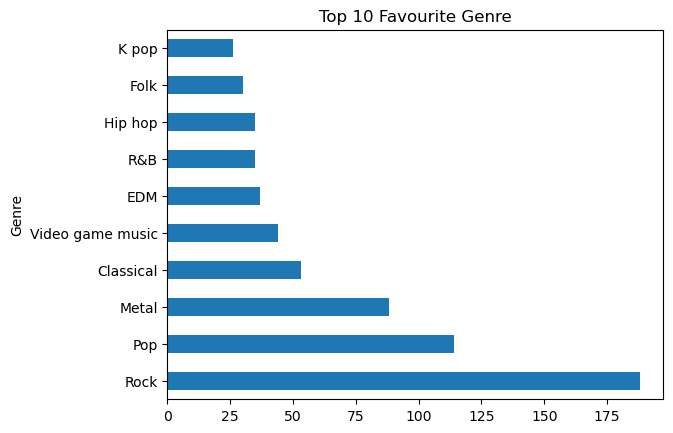

In [22]:
ax = df["Fav_genre"].value_counts().head(10).plot(kind = "barh", title ="Top 10 Favourite Genre")
ax.set_ylabel('Genre')

## 💡 Relationship Features

<Axes: >

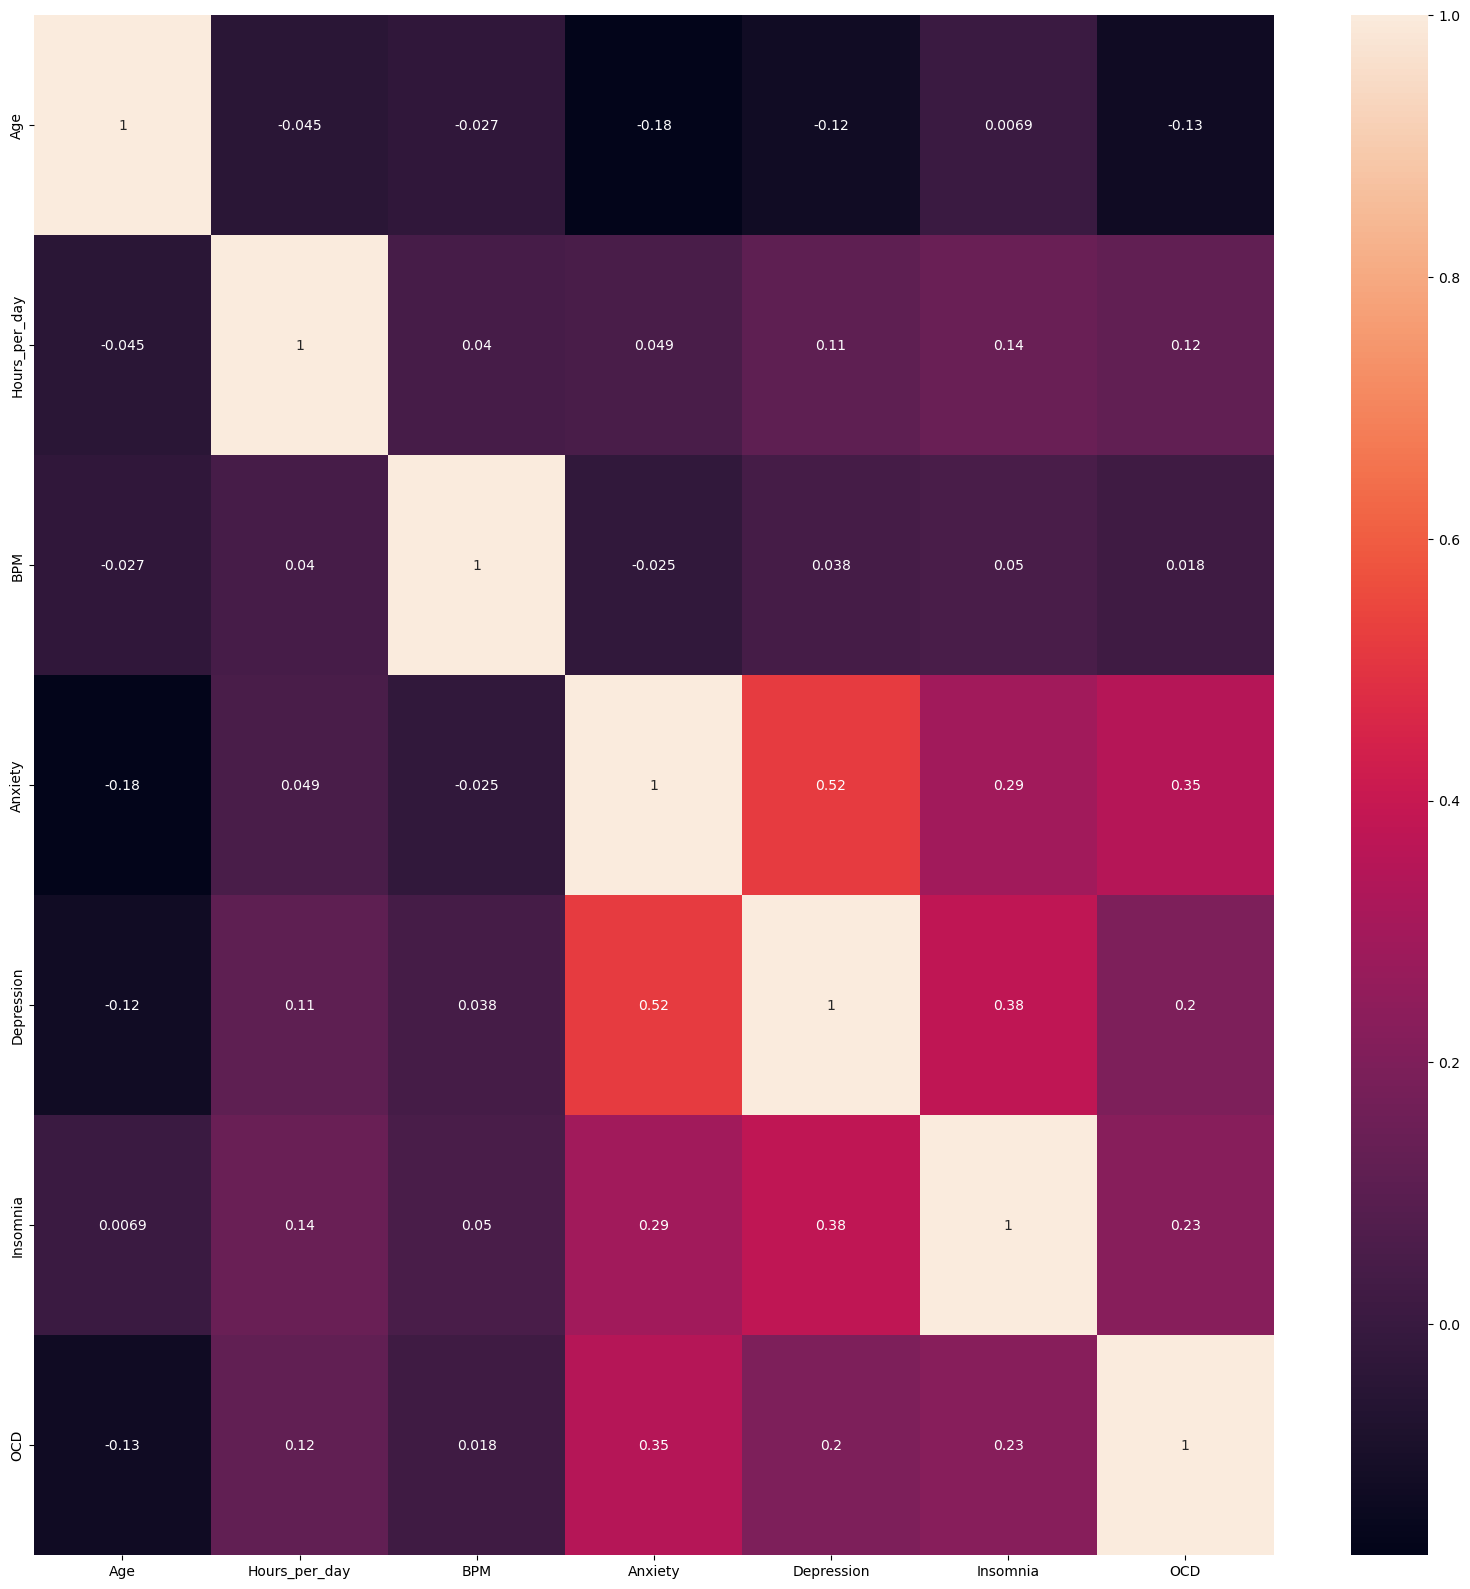

In [23]:
#check for data correlations
plt.figure(figsize=(20,20))
cq_corr = df.corr(method='pearson')
sns.heatmap(cq_corr, annot = True)